# 회귀
- 인과 관계를 파악하는 분석
- 머신러닝에서의 회귀 : 설명변수로부터 결과변수를 예측하는 모델(함수식)을 구함
    - 이 때의 결과변수는 category형이 아닌 연속값

## 회귀모델 유형
- 선형/비선형 : 회귀계수 결합에 따라
- 단순/다중 : 독립변수 개수에 따라

### OLS 회귀분석 종류
- 단순 회귀 분석 : **하나**의 독립변수로 **하나**의 종속변수를 설명하는 모형
- 다중 회귀 분석 : **두 개 이상**의 독립변수로 **하나**의 종속변수를 설명하는 모형
- 다항 회귀 분석 : 독립변수와 종속변수의 관계를 **2차 이상의 함수**로 설명
- 다변량 회귀 분석 : **두 개 이상**의 종속변수를 사용하는 모형

## 선형 회귀(Linear Regression)
### 목적
- 설명 : 종속변수에 대한 설명변수의 영향을 측정, 설명
- 예측 : 모델 함수식을 통해 설명변수에 따른 종속변수의 값을 예측

### 함수식
- $Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + ... + \beta_n X_{ni}$
- 독립 변수($X_i$) : 서로 상관관계가 적고 독립적인 변수
    - feature
- 종속 변수($Y_i$) : 독립 변수의 영향을 받는 변수
    - label
- 회귀 계수($\beta_i$) : 변수의 값에 영향을 미치는 것
    - weight

### 목적식
- RSS(**R**esidual **S**um of **S**quares)
- $\min \sum e_i^2 \, \text{where} \, e_i=y_i-\hat{y_i}$ 
- $y_i$ : 원래 데이터의 값
- $\hat{y_i}$ : 함수식으로 예측한 y값
- $e_i$ : 잔차

### 주요 가정
- 선형성 : 독립변수와 종속변수는 선형 관계에 있다.
- 정규성 : 오차는 정규분포를 따른다. ($\epsilon_i \sim N(0,\sigma^2)$)
- 등분산성 : 오차는 같은 분산을 가진다.
- 독립성 : 오차는 서로 독립이다.

### 머신러닝에서
- RSS가 최소가 될 수 있는 최적의 회귀 계수를 찾는 것
- RSS를 비용함수(Cost Function) 또는 손실함수(Loss Function)라고 함

# 경사하강법
- 각 점(W)에서 기울기(편미분값)을 구한 뒤 learning rate와 기울기를 곱한 값만큼을 원래 값에 update하여 비용 함수를 구하고, 그 비용 함수가 더 이상 줄어들지 않으면 종료

### 예시

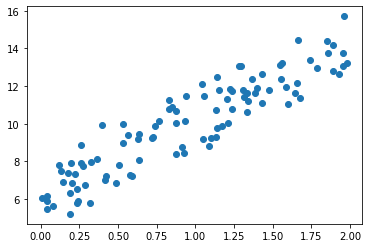

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 6 + 4X (w0=6, w1=4)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, y)

### 비용 함수

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

### 경사 하강법

In [3]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # w1, w0 업데이트할 저장소
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # Yhat = w0 + w1*X
    diff = y - y_pred
    
    # w0 update 계산을 위한 행렬
    w0_factors = np.ones((N, 1))
    
    # w1, w0 update
    w1_update = -(2/N) * learning_rate * np.dot(X.T, diff)
    w0_update = -(2/N) * learning_rate * np.dot(w0_factors.T, diff)
    
    return w1_update, w0_update

### w1, w0 update

In [4]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


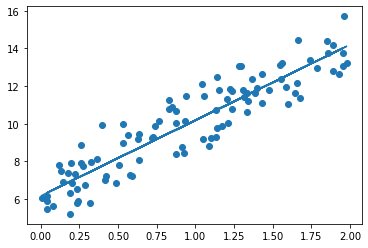

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### 미니배치 확률적 경사 하강법
- 모든 데이터에 적용하면 오래 걸리기 때문에 일부 데이터에만 적용한 경사하강법

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred1 = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9935


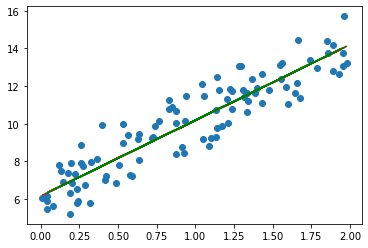

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-.')
plt.plot(X, y_pred1, 'g:')

## 평가 지표
- MAE : Mean Absolute Error
- MSE : Mean Squared Error
- RMSE : Root MSE
- R2
- MAE, MSE, RMSE는 값이 작을수록 좋고 R2는 1에 가까울수록 좋음
- sklearn의 평가 지표에서는 값이 큰 양수 우선이기 때문에, MAE, MSE는 'neg'가 붙은 음수값으로 바꾼 뒤 평가

In [12]:
from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(X, y) # 학습

LinearRegression()

In [13]:
y_pred = line_fitter.predict(np.array([[1.5248]]))
y_pred

array([[12.27327034]])

In [14]:
# 회귀 계수
line_fitter.coef_

array([[3.96846751]])

In [15]:
# 절편
line_fitter.intercept_

array([6.22215108])

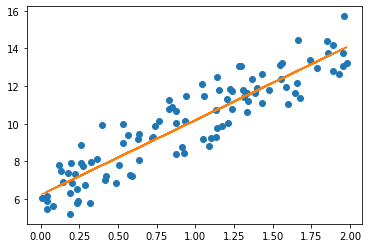

In [16]:
plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X))
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = line_fitter.predict(X)

MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(f'MAE : {MAE:.4f}')
print(f'MSE : {MSE:.4f}')
print(f'R2 : {R2:.4f}')

MAE : 0.8493
MSE : 0.9924
R2 : 0.8407
